In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv('matches.csv')
matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [3]:
deliveries = pd.read_csv('deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
matches['date'] = pd.to_datetime(matches['date'])


In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1044 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1076 non-null   float64       
 14  target_runs      1092 non-null   float64

In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [39]:
matches['result_margin'].fillna(matches['result_margin'].mean(), inplace=True)
matches['target_runs'].fillna(matches['target_runs'].mean(), inplace=True)
matches['target_overs'].fillna(matches['target_overs'].mean(), inplace=True)
matches['method'].fillna(matches['method'].mode()[0], inplace=True)
matches['city'].fillna(matches['city'].mode()[0], inplace=True)


In [40]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    5
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             5
result             0
result_margin      0
target_runs        0
target_overs       0
method             0
umpire1            0
umpire2            0
toss_match_win     0
dtype: int64

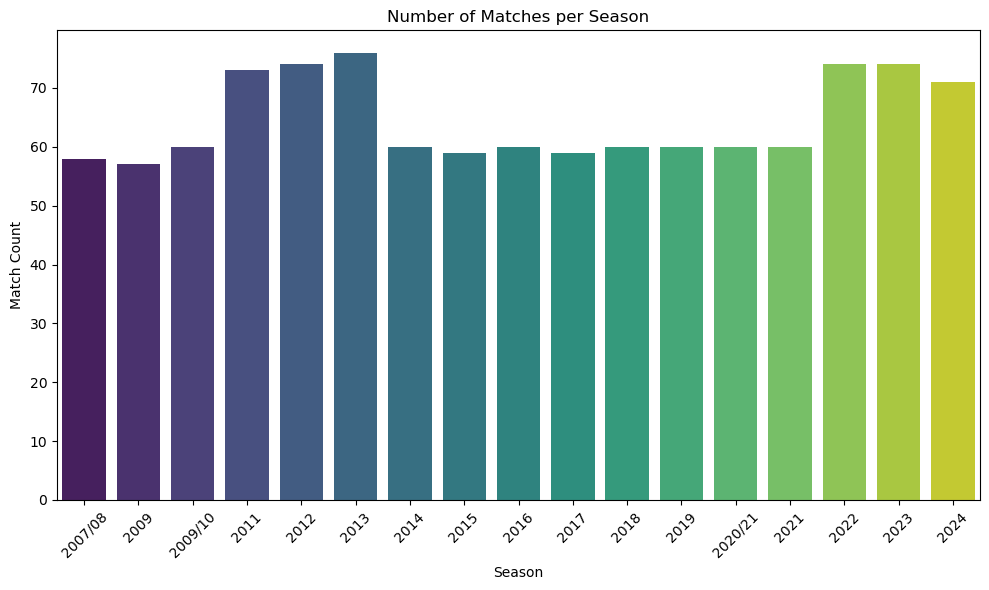

In [10]:
#number of matches per season
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=matches, palette='viridis')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


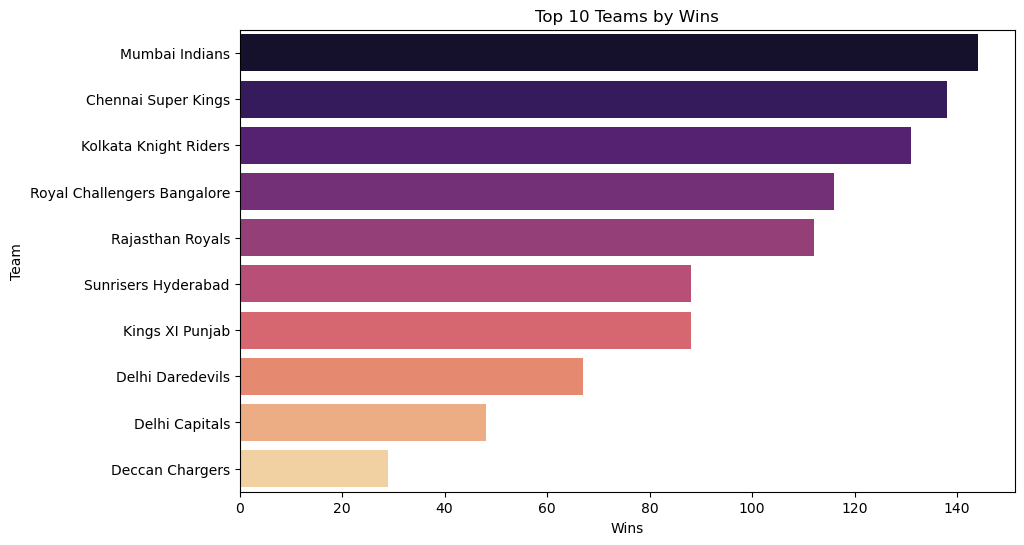

In [11]:
#Top 10 teams by win
top_winners = matches['winner'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_winners.values, y=top_winners.index, palette='magma')
plt.title('Top 10 Teams by Wins')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.show()

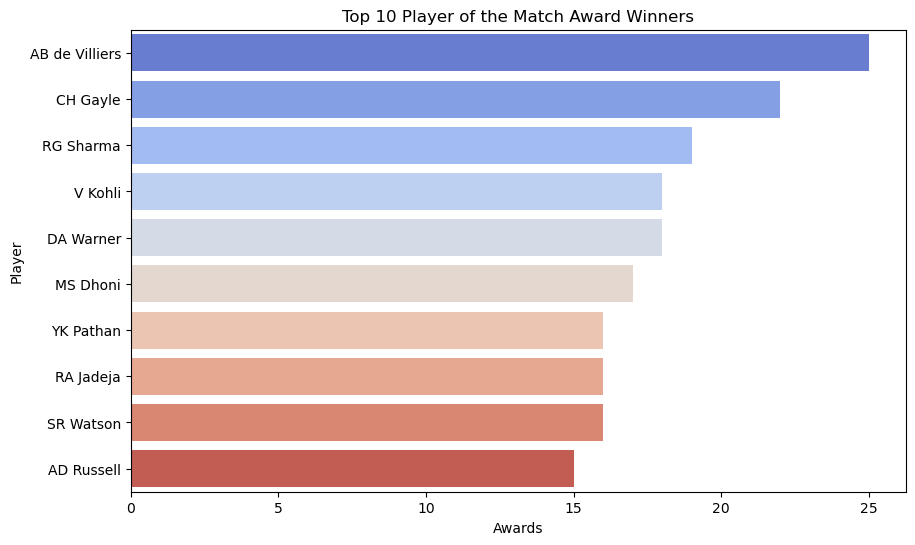

In [12]:
#Top 10 player of the match
top_players = matches['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_players.values, y=top_players.index, palette='coolwarm')
plt.title('Top 10 Player of the Match Award Winners')
plt.xlabel('Awards')
plt.ylabel('Player')
plt.show()


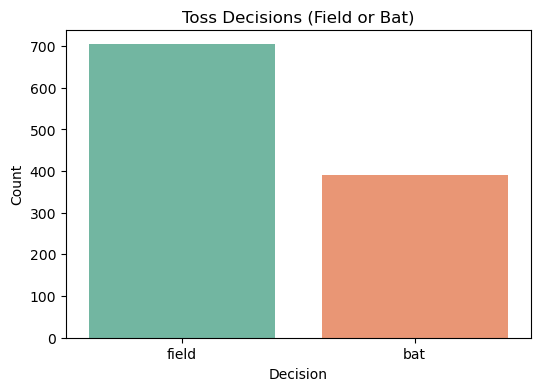

In [13]:
#Toss decision frequency
plt.figure(figsize=(6,4))
sns.countplot(x='toss_decision', data=matches, palette='Set2')
plt.title('Toss Decisions (Field or Bat)')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()


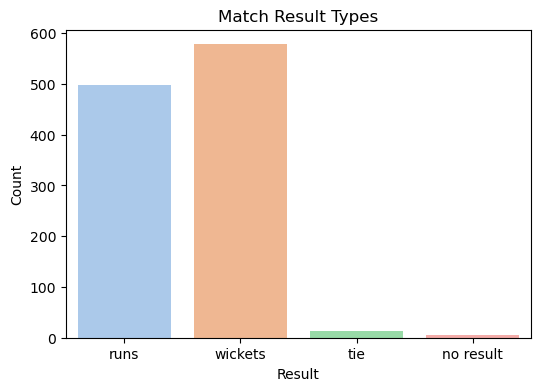

In [14]:
#Match results(normal,tie,..)
plt.figure(figsize=(6,4))
sns.countplot(x='result', data=matches, palette='pastel')
plt.title('Match Result Types')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()


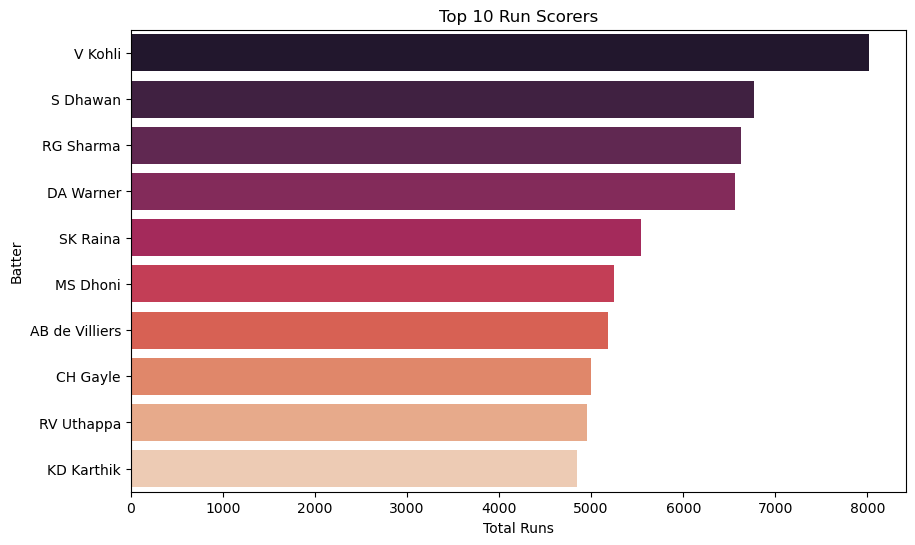

In [15]:
#top 10 run scorers(batsmen)
top_scorers = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='rocket')
plt.title('Top 10 Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.show()


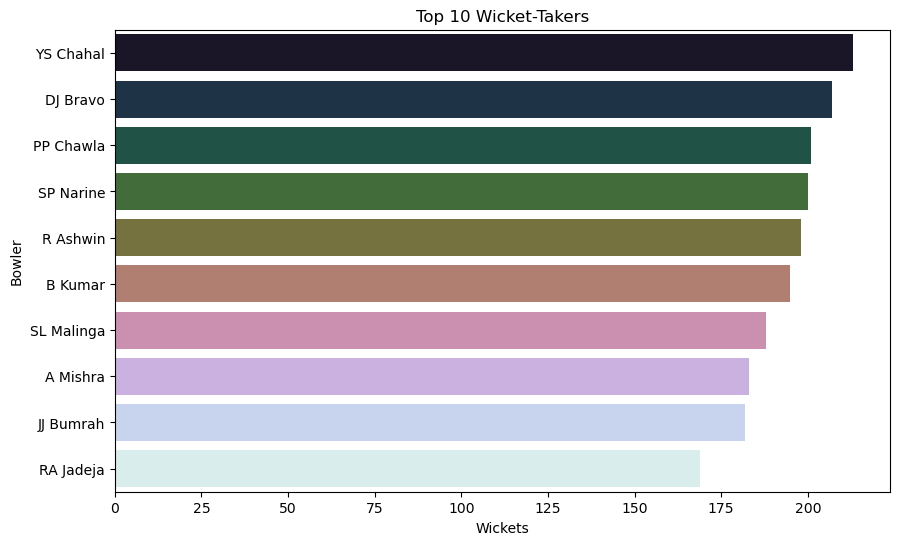

In [16]:
#Top 10 wicket keepers
wickets = deliveries[deliveries['is_wicket'] == 1]
top_bowlers = wickets['bowler'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='cubehelix')
plt.title('Top 10 Wicket-Takers')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.show()


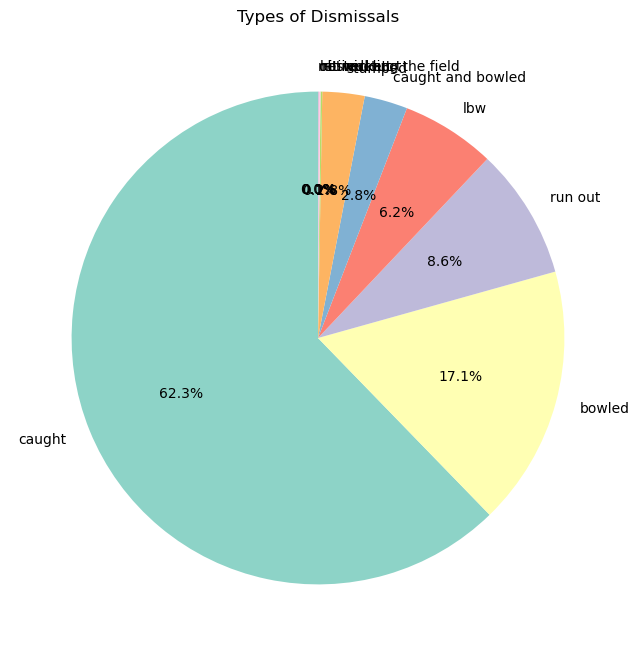

In [17]:
#Dismissall types Distribution
dismissal_kinds = deliveries['dismissal_kind'].value_counts()

plt.figure(figsize=(8,8))
dismissal_kinds.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Types of Dismissals')
plt.ylabel('')
plt.show()


In [4]:
#MATCH INSIGHTS
#Team with highest run rates
team_matches = matches['team1'].value_counts() + matches['team2'].value_counts()
team_wins = matches['winner'].value_counts()
win_rate = (team_wins / team_matches).sort_values(ascending=False)

print(win_rate)

Rising Pune Supergiant         0.625000
Gujarat Titans                 0.622222
Chennai Super Kings            0.579832
Mumbai Indians                 0.551724
Lucknow Super Giants           0.545455
Delhi Capitals                 0.527473
Kolkata Knight Riders          0.521912
Rajasthan Royals               0.506787
Sunrisers Hyderabad            0.483516
Royal Challengers Bangalore    0.483333
Royal Challengers Bengaluru    0.466667
Kings XI Punjab                0.463158
Gujarat Lions                  0.433333
Punjab Kings                   0.428571
Kochi Tuskers Kerala           0.428571
Delhi Daredevils               0.416149
Deccan Chargers                0.386667
Rising Pune Supergiants        0.357143
Pune Warriors                  0.260870
Name: count, dtype: float64


In [18]:
#is toss winning related to match winning
matches['toss_match_win'] = matches['toss_winner'] == matches['winner']
toss_win_rate = matches['toss_match_win'].mean()

print(f"Toss winning leads to match win: {toss_win_rate:.2%}")


Toss winning leads to match win: 50.59%


In [19]:
#which venues favour specifc teams
venue_team = matches.groupby(['venue', 'winner']).size().unstack().fillna(0)
venue_fav = venue_team.idxmax(axis=1)

print(venue_fav)


venue
Arun Jaitley Stadium                                                                  Delhi Capitals
Arun Jaitley Stadium, Delhi                                                           Delhi Capitals
Barabati Stadium                                                                     Deccan Chargers
Barsapara Cricket Stadium, Guwahati                                                     Punjab Kings
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow           Lucknow Super Giants
Brabourne Stadium                                                                     Mumbai Indians
Brabourne Stadium, Mumbai                                                             Delhi Capitals
Buffalo Park                                                                     Chennai Super Kings
De Beers Diamond Oval                                                            Chennai Super Kings
Dr DY Patil Sports Academy                                                           

In [22]:
#trends over seasons(team performance,match ciount)
season_matches = matches['season'].value_counts().sort_index()
season_team_perf = matches.groupby(['season', 'winner']).size().unstack().fillna(0)

season_matches



season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64

In [23]:
season_team_perf

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
season,,,,,,,,,,,,,,,,,,,
2007/08,9.0,2.0,0.0,7.0,0.0,0.0,10.0,0.0,6.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,4.0,0.0,0.0
2009,8.0,9.0,0.0,10.0,0.0,0.0,7.0,0.0,3.0,0.0,5.0,0.0,0.0,6.0,0.0,0.0,9.0,0.0,0.0
2009/10,9.0,8.0,0.0,7.0,0.0,0.0,4.0,0.0,7.0,0.0,11.0,0.0,0.0,6.0,0.0,0.0,8.0,0.0,0.0
2011,11.0,6.0,0.0,4.0,0.0,0.0,7.0,6.0,8.0,0.0,10.0,4.0,0.0,6.0,0.0,0.0,10.0,0.0,0.0
2012,10.0,4.0,0.0,11.0,0.0,0.0,8.0,0.0,12.0,0.0,10.0,4.0,0.0,7.0,0.0,0.0,8.0,0.0,0.0
2013,12.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,6.0,0.0,13.0,4.0,0.0,11.0,0.0,0.0,9.0,0.0,10.0
2014,10.0,0.0,0.0,2.0,0.0,0.0,12.0,0.0,11.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,5.0,0.0,6.0
2015,10.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,7.0,0.0,10.0,0.0,0.0,7.0,0.0,0.0,8.0,0.0,7.0
2016,0.0,0.0,0.0,7.0,9.0,0.0,4.0,0.0,8.0,0.0,7.0,0.0,0.0,0.0,0.0,5.0,9.0,0.0,11.0


In [24]:
#Player Insights
#Top run scores and consistency
top_scorers = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print(top_scorers)


batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


In [25]:
#Top wicket takers
wickets = deliveries[deliveries['is_wicket'] == 1]
top_bowlers = wickets['bowler'].value_counts().head(10)
print(top_bowlers)


bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: count, dtype: int64


In [26]:
#Most 'player of the match' awards
top_players = matches['player_of_match'].value_counts().head(10)
print(top_players)


player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64


In [27]:
#Dismissal patterns
dismissal_kinds = deliveries['dismissal_kind'].value_counts()
print(dismissal_kinds)


dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


In [52]:
# Match Patterns
# Performance: Batting first vs chasing
import pandas as pd
print(f"Missing values in 'winner': {matches['winner'].isna().sum()}")
matches_cleaned = matches.dropna(subset=['winner'])
matches_cleaned['batting_first'] = matches_cleaned.apply(lambda row: 
    row['team1'] if row['toss_winner'] == row['team1'] and row['toss_decision'] == 'bat' 
    else row['team2'] if row['toss_winner'] == row['team2'] and row['toss_decision'] == 'bat' 
    else row['team2'] if row['toss_winner'] == row['team1'] and row['toss_decision'] == 'field' 
    else row['team1'], axis=1)
batting_first_wins = matches_cleaned[matches_cleaned['batting_first'] == matches_cleaned['winner']]
batting_first_win_rate = round((len(batting_first_wins) / len(matches_cleaned)) * 100, 2)
print(f"Batting First Win Rate: {batting_first_win_rate}%")



Missing values in 'winner': 5
✅ Batting First Win Rate: 45.87%


In [53]:
#Powerplay (overs 1–6) and Death Overs (16–20) analysis
powerplay = deliveries[deliveries['over'] <= 6]
death_overs = deliveries[deliveries['over'] >= 16]

powerplay_runs = powerplay.groupby('match_id')['total_runs'].sum().mean()
death_runs = death_overs.groupby('match_id')['total_runs'].sum().mean()

print(f"Avg Powerplay Runs: {powerplay_runs:.2f}")
print(f"Avg Death Overs Runs: {death_runs:.2f}")


Avg Powerplay Runs: 107.81
Avg Death Overs Runs: 70.09


In [56]:
#Average first innings score by venue
# Merge deliveries with matches to bring in the 'venue' column
merged_df = deliveries.merge(matches[['id', 'venue']], left_on='match_id', right_on='id', how='left')
first_innings = merged_df[merged_df['inning'] == 1]
venue_scores = first_innings.groupby(['match_id', 'batting_team', 'venue'])['total_runs'].sum().reset_index()
venue_avg = venue_scores.groupby('venue')['total_runs'].mean().sort_values(ascending=False)
print(venue_avg)


venue
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam       231.500000
Himachal Pradesh Cricket Association Stadium, Dharamsala                 202.000000
Arun Jaitley Stadium, Delhi                                              199.062500
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh         197.800000
M Chinnaswamy Stadium, Bengaluru                                         196.214286
Eden Gardens, Kolkata                                                    195.625000
Rajiv Gandhi International Stadium, Uppal, Hyderabad                     188.384615
Brabourne Stadium                                                        180.400000
Barsapara Cricket Stadium, Guwahati                                      180.000000
Sawai Mansingh Stadium, Jaipur                                           179.500000
Brabourne Stadium, Mumbai                                                177.411765
Wankhede Stadium, Mumbai                                              

In [57]:
#Predicting match winner based on toss, venue, teams
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = matches[['team1', 'team2', 'toss_winner', 'venue']]
target = matches['winner']

# Encode if not already done
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in features.columns:
    features[col] = le.fit_transform(features[col])
target = le.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f'Match winner prediction accuracy: {accuracy:.2%}')


Match winner prediction accuracy: 43.84%


In [58]:
#Classify high/low scoring matches
# Tag high scoring matches (1st innings runs > threshold)
first_innings_total = first_innings.groupby('match_id')['total_runs'].sum()
score_threshold = first_innings_total.median()
match_labels = (first_innings_total > score_threshold).astype(int)

# Features: batting_team, bowling_team, venue
features = first_innings[['match_id', 'batting_team', 'bowling_team', 'venue']].drop_duplicates()
features = features.set_index('match_id').loc[match_labels.index]

# Encode
for col in features.columns:
    features[col] = le.fit_transform(features[col])

X_train, X_test, y_train, y_test = train_test_split(features, match_labels, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f'High/Low score classification accuracy: {model.score(X_test, y_test):.2%}')


High/Low score classification accuracy: 56.16%


In [74]:
#RANDOM FOREST CLASSIFIER

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [60]:
# Drop rows with missing winner (no result/abandoned)
matches = matches.dropna(subset=['winner'])

# Optional: fill missing player_of_match with "Unknown"
matches['player_of_match'].fillna('Unknown', inplace=True)

# Fill missing city with mode
matches['city'].fillna(matches['city'].mode()[0], inplace=True)


In [66]:
df = matches[['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'city', 'season', 'winner']]
df.head()


,team1,team2,toss_winner,toss_decision,venue,city,season,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,2007/08,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,"Punjab Cricket Association Stadium, Mohali",Chandigarh,2007/08,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Feroz Shah Kotla,Delhi,2007/08,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Wankhede Stadium,Mumbai,2007/08,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Eden Gardens,Kolkata,2007/08,Kolkata Knight Riders


In [67]:
# Fix season column: convert '2020/21' to 2020
df['season'] = df['season'].astype(str).str.extract(r'(\d{4})').astype(int)


In [68]:
# Combine all teams to encode consistently
teams = pd.concat([df['team1'], df['team2'], df['toss_winner'], df['winner']]).unique()

le = LabelEncoder()
for col in ['team1', 'team2', 'toss_winner', 'winner', 'venue', 'city', 'toss_decision']:
    df[col] = le.fit_transform(df[col])


In [69]:
X = df.drop('winner', axis=1)
y = df['winner']


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [72]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Match Winner Prediction Accuracy: {accuracy:.2f}%")


Match Winner Prediction Accuracy: 47.71%


In [78]:
#DECISION TREE

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# Drop rows with missing target variable
matches = matches.dropna(subset=['winner'])

# Fill numeric NaNs with mean
for col in ['result_margin', 'target_runs', 'target_overs']:
    matches[col].fillna(matches[col].mean(), inplace=True)

# Check object columns that need encoding
cat_cols = matches.select_dtypes(include='object').columns.tolist()

# Optional: print to check
# print("Categorical Columns:", cat_cols)

# Label encode all object columns
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    matches[col] = le.fit_transform(matches[col].astype(str))
    le_dict[col] = le  # store encoders if you need to inverse later

In [81]:
features = ['team1', 'team2', 'toss_winner', 'venue', 'toss_decision', 'match_type', 
            'result_margin', 'target_runs', 'target_overs', 'super_over', 'city']

X = matches[features]
y = matches['winner']


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [84]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Match Winner Prediction Accuracy: {accuracy*100:.2f}%")


Match Winner Prediction Accuracy: 49.08%



Classification Report:



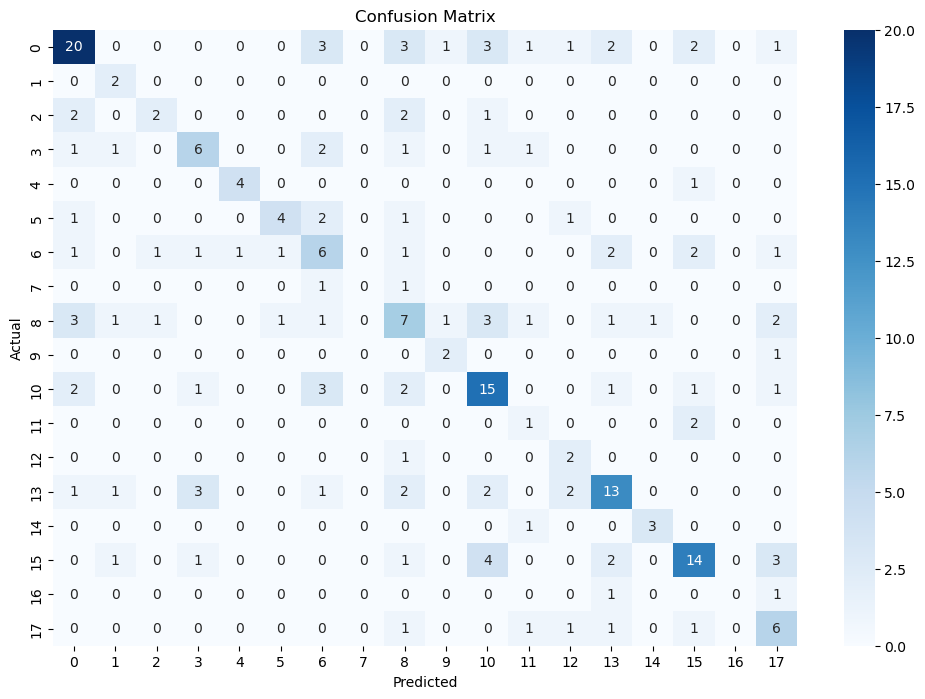

In [87]:
print("\nClassification Report:\n")
classification_report(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


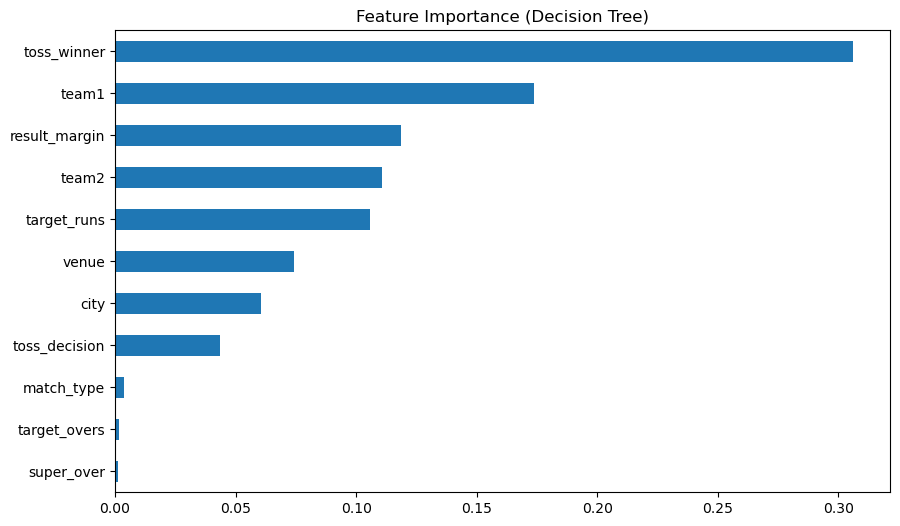

In [88]:
importances = pd.Series(dt_model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance (Decision Tree)")
plt.show()


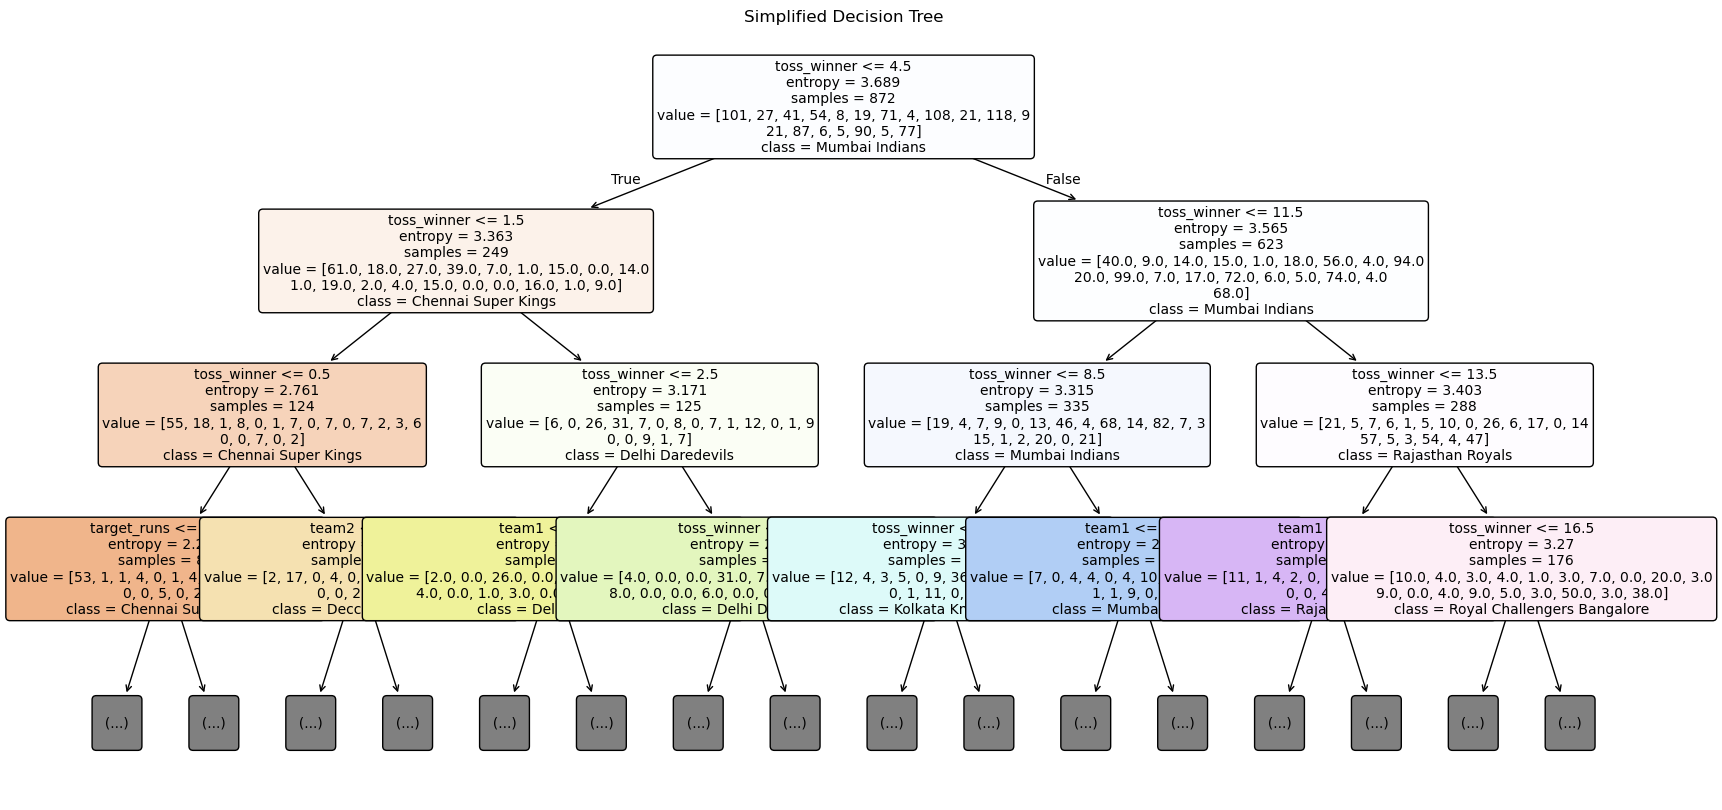

In [91]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=le_dict['winner'].classes_,
          filled=True, rounded=True, max_depth=3, fontsize=10)
plt.title("Simplified Decision Tree")
plt.show()


In [92]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
matches = pd.read_csv("matches.csv")

# Drop rows with missing target
matches.dropna(subset=["winner"], inplace=True)

# Fill missing values for 'city' and 'player_of_match'
matches["city"].fillna("Unknown", inplace=True)
matches["player_of_match"].fillna("Unknown", inplace=True)

# Encode target variable
label_encoder = LabelEncoder()
matches["winner_encoded"] = label_encoder.fit_transform(matches["winner"])

# Encode categorical features
for col in ["team1", "team2", "toss_winner", "venue", "city", "player_of_match"]:
    matches[col] = label_encoder.fit_transform(matches[col])

# Select features
features = ["team1", "team2", "toss_winner", "venue", "city", "toss_decision", "result_margin"]
X = matches[features]
X["toss_decision"] = label_encoder.fit_transform(matches["toss_decision"])

# Target
y = matches["winner_encoded"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Match Winner Prediction Accuracy: {accuracy * 100:.2f}%")



Random Forest Match Winner Prediction Accuracy: 58.72%
